# Выбор модели Re-Identification

## Подготовка данных

In [70]:
import os

import torch
import torchvision.transforms.functional as F
from PIL import Image

In [71]:
file_paths = []
directory = 'dataset/test'

for entry in os.listdir(directory):
    full_path = os.path.join(directory, entry)
    if os.path.isfile(full_path):
        file_paths.append(entry)

In [72]:
class_list = [int(c[:4]) for c in file_paths]

In [73]:
import torchvision.transforms.functional as F
from PIL import Image

In [74]:
imgs = []
for file_name in file_paths:
    img = Image.open(os.path.join(directory, file_name)).convert('RGB')
    img_t = F.to_tensor(img)
    imgs.append(img_t)

In [75]:
imgs_t = torch.stack(imgs, dim=0)

In [76]:
imgs_t.shape

torch.Size([67, 3, 128, 64])

### Нормализация

In [77]:
imgs_t.view(3, -1).mean(dim=1), imgs_t.view(3, -1).std(dim=1)

(tensor([0.3906, 0.4147, 0.4100]), tensor([0.2000, 0.2151, 0.2178]))

In [78]:
imgs_t = F.normalize(imgs_t, [0.3985, 0.4075, 0.4186], [0.2226, 0.2244, 0.2333])

## Тесты моделей

In [79]:
import torch

from clothclassify import models

### mobilenetv2_x1_4

In [80]:
model = models.build_model('mobilenetv2_x1_4', 751, 'triplet',pretrained=False)

In [81]:
from collections import OrderedDict

def fix_state_dict(state_dict):
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k[7:] if k.startswith('module.') else k  # удаляем 'module.' если есть
        new_state_dict[name] = v
    return new_state_dict

In [82]:
state_dict = torch.load('checkpoint/mobilenetv2_1dot4_market.pth.tar', weights_only=False)

In [83]:
state_dict.keys()

odict_keys(['module.conv1.conv.weight', 'module.conv1.bn.weight', 'module.conv1.bn.bias', 'module.conv1.bn.running_mean', 'module.conv1.bn.running_var', 'module.conv1.bn.num_batches_tracked', 'module.conv2.0.conv1.conv.weight', 'module.conv2.0.conv1.bn.weight', 'module.conv2.0.conv1.bn.bias', 'module.conv2.0.conv1.bn.running_mean', 'module.conv2.0.conv1.bn.running_var', 'module.conv2.0.conv1.bn.num_batches_tracked', 'module.conv2.0.dwconv2.conv.weight', 'module.conv2.0.dwconv2.bn.weight', 'module.conv2.0.dwconv2.bn.bias', 'module.conv2.0.dwconv2.bn.running_mean', 'module.conv2.0.dwconv2.bn.running_var', 'module.conv2.0.dwconv2.bn.num_batches_tracked', 'module.conv2.0.conv3.0.weight', 'module.conv2.0.conv3.1.weight', 'module.conv2.0.conv3.1.bias', 'module.conv2.0.conv3.1.running_mean', 'module.conv2.0.conv3.1.running_var', 'module.conv2.0.conv3.1.num_batches_tracked', 'module.conv3.0.conv1.conv.weight', 'module.conv3.0.conv1.bn.weight', 'module.conv3.0.conv1.bn.bias', 'module.conv3.0.co

In [84]:
state_dict = fix_state_dict(state_dict)

In [85]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [86]:
res = model(imgs_t)

#### Проекция TSNE

In [87]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [88]:
X = res[1].cpu().detach().numpy()

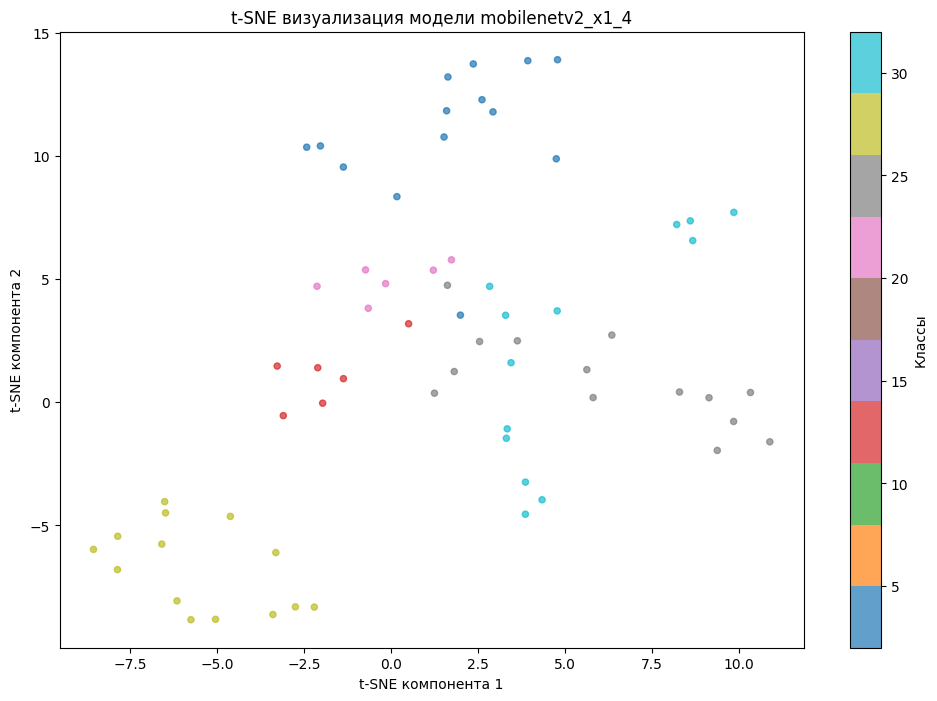

In [89]:
tsne = TSNE(n_components=2, random_state=42, perplexity=13)
X_tsne = tsne.fit_transform(X)

# Визуализируем с цветами по классам
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=class_list, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title('t-SNE визуализация модели mobilenetv2_x1_4')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

### Osnet x1.0 market

In [90]:
model = models.build_model('osnet_x1_0', 751, 'triplet', pretrained=True)

In [91]:
res = model(imgs_t)

#### Проекция TSNE

In [92]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [93]:
X = res[1].cpu().detach().numpy()

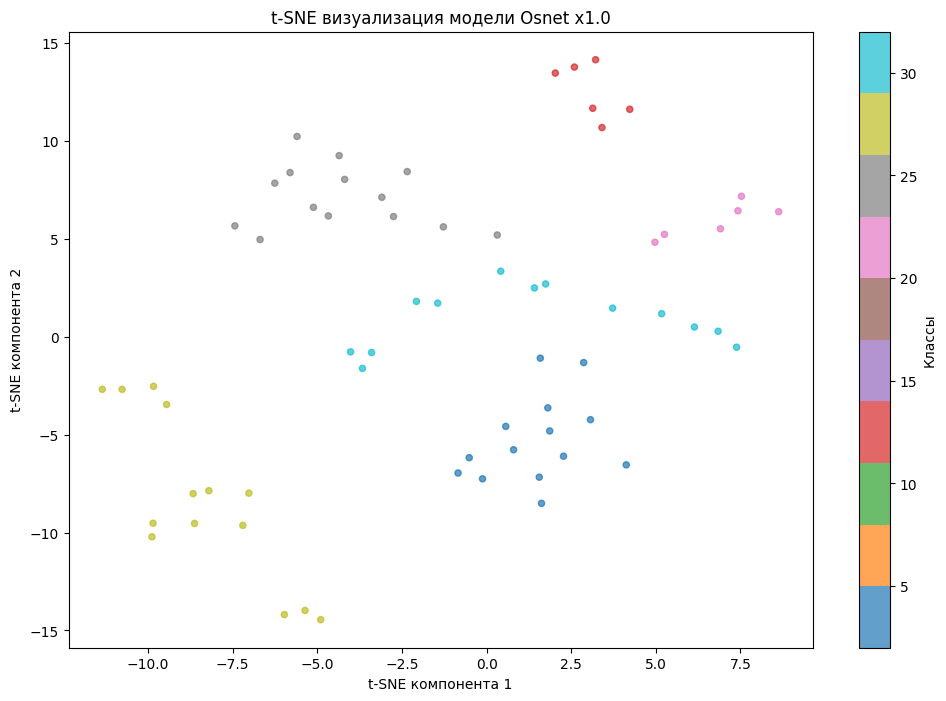

In [94]:
tsne = TSNE(n_components=2, random_state=42, perplexity=13)
X_tsne = tsne.fit_transform(X)

# Визуализируем с цветами по классам
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=class_list, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title('t-SNE визуализация модели Osnet x1.0')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

### Osnet_ain x1.0 MS+D+C

In [95]:
model = models.build_model('osnet_ain_x1_0', 2510, 'triplet', pretrained=True)

In [96]:
res = model(imgs_t)

#### Проекция TSNE

In [97]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [98]:
X = res[1].cpu().detach().numpy()

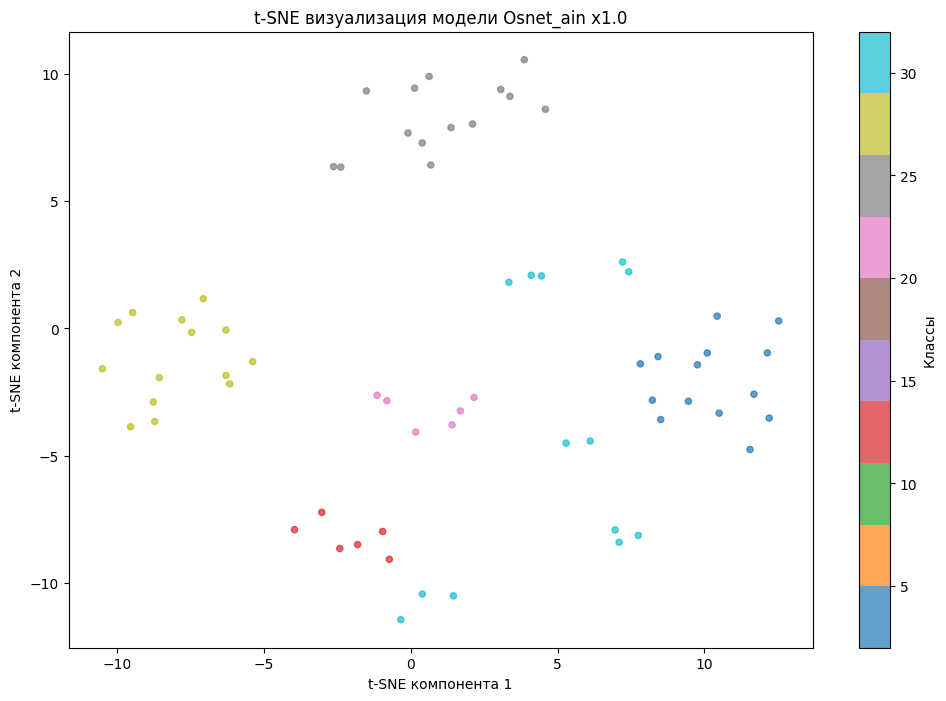

In [99]:
tsne = TSNE(n_components=2, random_state=42, perplexity=13)
X_tsne = tsne.fit_transform(X)

# Визуализируем с цветами по классам
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=class_list, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title('t-SNE визуализация модели Osnet_ain x1.0')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

### osnet_ibn_x1_0 market

In [100]:
model = models.build_model('osnet_ibn_x1_0', 751, 'triplet', pretrained=True)

In [101]:
res = model(imgs_t)

#### Проекция TSNE

In [102]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [103]:
X = res[1].cpu().detach().numpy()

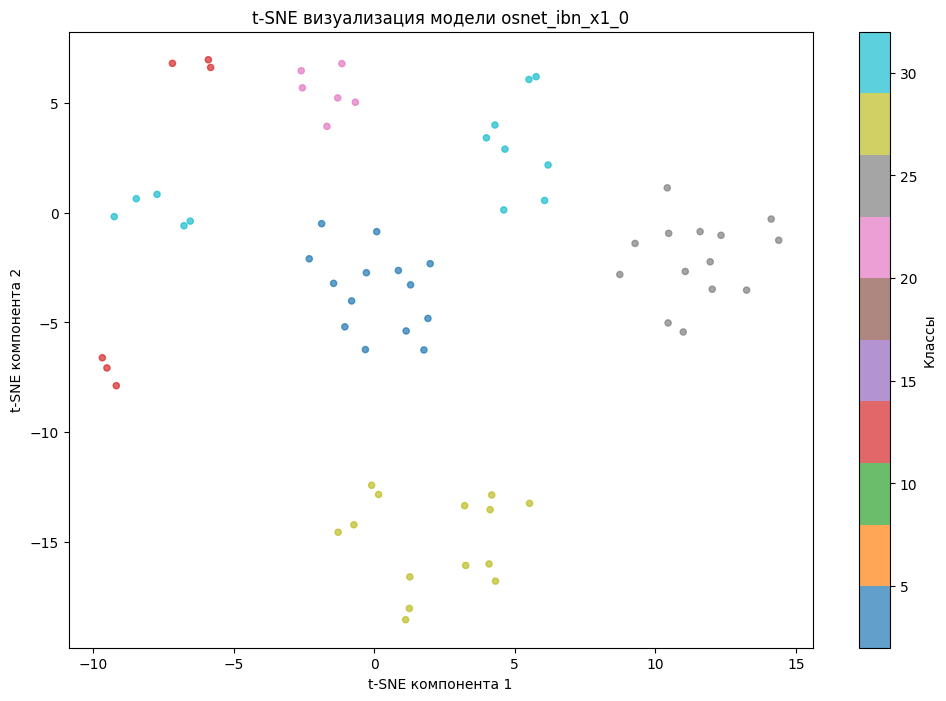

In [104]:
tsne = TSNE(n_components=2, random_state=42, perplexity=13)
X_tsne = tsne.fit_transform(X)

# Визуализируем с цветами по классам
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=class_list, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title('t-SNE визуализация модели osnet_ibn_x1_0')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

### hacnn market

In [105]:
model = models.build_model('hacnn', 751, 'triplet', pretrained=True)

odict_keys(['conv.conv.weight', 'conv.conv.bias', 'conv.bn.weight', 'conv.bn.bias', 'conv.bn.running_mean', 'conv.bn.running_var', 'conv.bn.num_batches_tracked', 'inception1.0.stream1.0.conv.weight', 'inception1.0.stream1.0.conv.bias', 'inception1.0.stream1.0.bn.weight', 'inception1.0.stream1.0.bn.bias', 'inception1.0.stream1.0.bn.running_mean', 'inception1.0.stream1.0.bn.running_var', 'inception1.0.stream1.0.bn.num_batches_tracked', 'inception1.0.stream1.1.conv.weight', 'inception1.0.stream1.1.conv.bias', 'inception1.0.stream1.1.bn.weight', 'inception1.0.stream1.1.bn.bias', 'inception1.0.stream1.1.bn.running_mean', 'inception1.0.stream1.1.bn.running_var', 'inception1.0.stream1.1.bn.num_batches_tracked', 'inception1.0.stream2.0.conv.weight', 'inception1.0.stream2.0.conv.bias', 'inception1.0.stream2.0.bn.weight', 'inception1.0.stream2.0.bn.bias', 'inception1.0.stream2.0.bn.running_mean', 'inception1.0.stream2.0.bn.running_var', 'inception1.0.stream2.0.bn.num_batches_tracked', 'inception

In [109]:
model = model.to('cuda')

In [110]:
imgs_t_160 = F.resize(imgs_t, (160,64)).to('cuda')

In [111]:
res = model(imgs_t_160)

#### Проекция TSNE

In [112]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [113]:
X = res[1][1].cpu().detach().numpy()

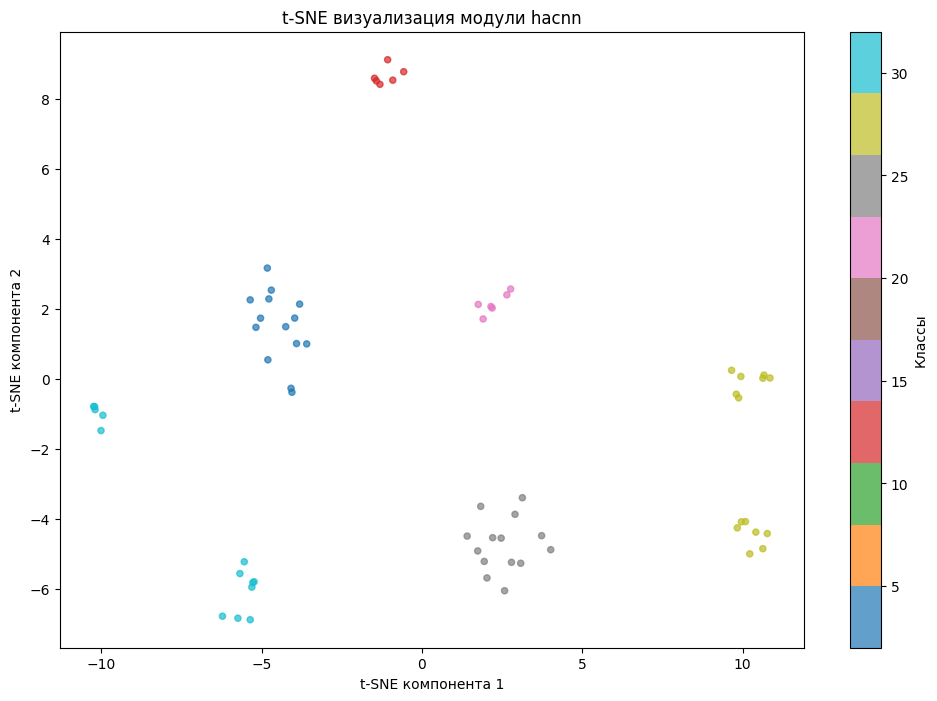

In [114]:
tsne = TSNE(n_components=2, random_state=42, perplexity=13)
X_tsne = tsne.fit_transform(X)

# Визуализируем с цветами по классам
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=class_list, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title('t-SNE визуализация модули hacnn')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()